Este código permite comparar el rendimiento de diferentes optimizadores en el entrenamiento de una red neuronal para clasificar imágenes de dígitos manuscritos.

Descripción breve de los optimizadores utilizados en el código:
1. Adam (Adaptive Moment Estimation):

Es un optimizador adaptativo muy popular que combina las ventajas de SGD con momentum y RMSprop.
Ajusta automáticamente la tasa de aprendizaje por parámetro, lo que lo hace adecuado para problemas con diferentes escalas de gradiente.
Es conocido por su convergencia rápida y buena generalización.
2. SGD (Stochastic Gradient Descent):

Es el optimizador clásico para el entrenamiento de redes neuronales.
Actualiza los pesos de la red en la dirección del gradiente negativo de la función de pérdida.
Es simple de implementar y computacionalmente eficiente.
Sin embargo, puede ser sensible a la elección de la tasa de aprendizaje y puede converger a soluciones subóptimas.
3. SGD con Momentum:

Es una variante de SGD que introduce un término de "momentum" para mejorar la convergencia.
El momentum conserva el "impulso" de actualizaciones anteriores, lo que ayuda a que el modelo se mueva en una dirección más consistente.
Puede ser más rápido y estable que el SGD básico.
4. SGD con Nesterov:

Es una variante de SGD con Momentum que utiliza una actualización de "lookahead" para mejorar aún más la convergencia.
El algoritmo estima la posición futura del mínimo y actualiza los pesos en esa dirección.
Puede ser aún más rápido y preciso que el SGD con Momentum básico.
5. Adagrad:

Es un optimizador adaptativo que ajusta la tasa de aprendizaje por parámetro en función de su historial de actualizaciones.
Reduce la tasa de aprendizaje para parámetros que se actualizan con frecuencia, evitando que dominen el entrenamiento.
Puede ser útil para problemas con parámetros con escalas diferentes.
6. Adadelta:

Es una variante de Adagrad que utiliza un enfoque de "ventana móvil" para estimar el historial de actualizaciones.
Es menos sensible a los valores iniciales de los parámetros que Adagrad.
Puede ser una buena opción para problemas con datos ruidosos o escasos.
7. RMSprop (Root Mean Square Propagation):

Es un optimizador adaptativo que utiliza la raíz cuadrada media ponderada del gradiente para ajustar la tasa de aprendizaje.
Es similar a Adagrad, pero utiliza una estimación del gradiente más robusta al ruido.
Puede ser útil para problemas con gradientes ruidosos o que cambian rápidamente.

Se usó la función de activación ReLU que ofrece una combinación de simplicidad, eficiencia, no linealidad efectiva, popularidad y facilidad de interpretación que la convierten en una opción sólida para iniciar el análisis de datos con redes neuronales

Activación: RELU

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo de red neuronal
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo con diferentes optimizadores (personalice los SGD para que se distingan)
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])




# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])



# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))




11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2921 - accuracy: 0.9158
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1418 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1062 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0897 - accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9764
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0554 - accuracy: 0.9832
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9855
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0473 - accuracy: 0.9860
Epoch 5/5
313/313 [======

Gráfico de barras: Precisión vs. Optimizador

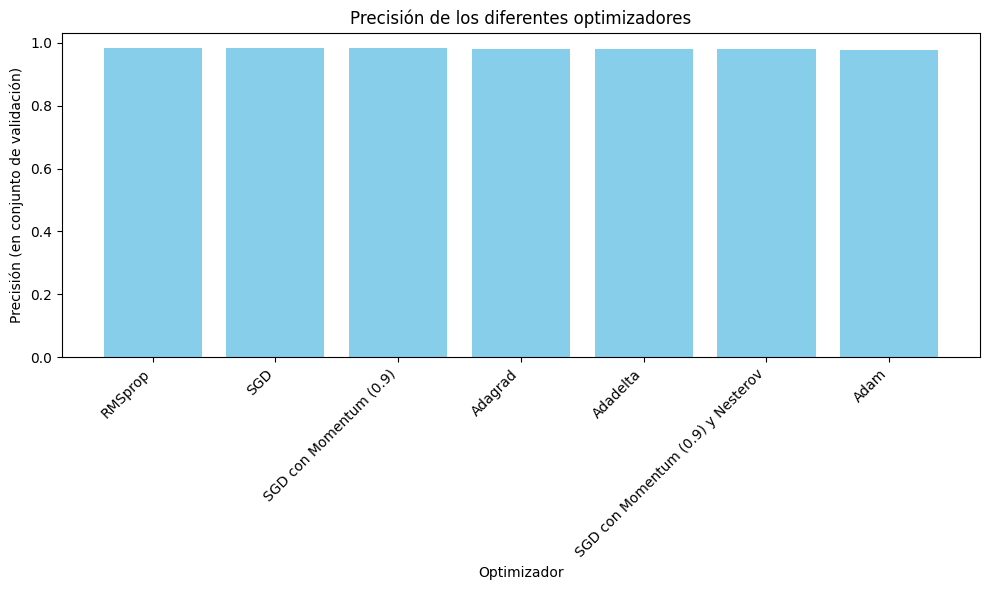

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Dataframe de resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])

# Precisión en orden descendente
df_sorted = df.sort_values(by='Precisión', ascending=False)

# Nombres de optimizadores y la precisión
optimizadores = df_sorted['Nombre Optimizador'].to_numpy()
precisiones = df_sorted['Precisión'].to_numpy()

# gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(optimizadores, precisiones, color='skyblue')
plt.xlabel('Optimizador')
plt.ylabel('Precisión (en conjunto de validación)')
plt.title('Precisión de los diferentes optimizadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Gráfico de barras: Pérdida vs. Optimizador

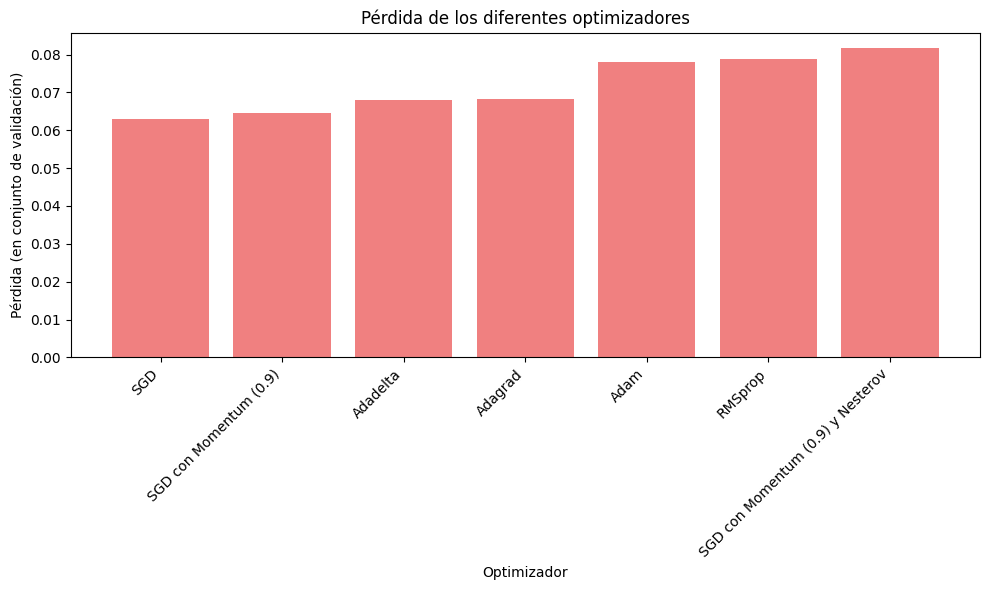

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])

# Ordenar pérdida en orden ascendente
df_sorted = df.sort_values(by='Pérdida')

optimizadores = df_sorted['Nombre Optimizador'].to_numpy()
perdidas = df_sorted['Pérdida'].to_numpy()

#gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(optimizadores, perdidas, color='lightcoral')
plt.xlabel('Optimizador')
plt.ylabel('Pérdida (en conjunto de validación)')
plt.title('Pérdida de los diferentes optimizadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


La función de activación sigmoide es una opción clásica en redes neuronales, particularmente útil para tareas de clasificación y donde se requiere normalizar las salida

Cambio de activación: SIGMOIDE

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


def entrenar_con_activacion(nombre_activacion):
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.layers[1].activation = nombre_activacion  #activación para la capa Dense

  model.fit(x_train, y_train, epochs=5)
  perdida, precision = model.evaluate(x_test, y_test)

  return [nombre_activacion, precision, perdida]


# Entrenamiento del modelo
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])



# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])


# Impresión de la tabla con tabulate

titulo = "\n\n\Activación Sigmoide\n"
tabla_formateada = tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f")
print(titulo + tabla_formateada)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4464 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2326 - accuracy: 0.9318
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1755 - accuracy: 0.9489
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1419 - accuracy: 0.9579
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9690
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1015 - accuracy: 0.9706
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0988 - accuracy: 0.9718
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0990 - accuracy: 0.9714
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0989 - accuracy: 0.9720
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0

La función de activación tanh ofrece una alternativa a la sigmoide con mejor flujo de gradiente y la posibilidad de representar valores tanto positivos como negativos

Cambio de activación: TANH

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo de red neuronal
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


def entrenar_con_activacion(nombre_activacion):
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.layers[1].activation = nombre_activacion  #activación para la capa Dense

  model.fit(x_train, y_train, epochs=5)
  perdida, precision = model.evaluate(x_test, y_test)

  return [nombre_activacion, precision, perdida]


# Entrenamiento del modelo
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])




# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])



# Impresión de la tabla con tabulate
titulo = "\n\nActivación Tanh\n"
tabla_formateada = tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f")
print(titulo + tabla_formateada)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3261 - accuracy: 0.9041
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1863 - accuracy: 0.9457
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1454 - accuracy: 0.9563
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1191 - accuracy: 0.9631
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9703
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0819 - accuracy: 0.9745
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0764 - accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0748 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9773
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0

La función de activación Leaky ReLU es una mejora sobre ReLU que permite cierta actividad para entradas negativas, lo que puede ayudar a evitar la muerte de neuronas y mejorar el flujo de gradiente en el entrenamiento. Es una opción popular para redes neuronales profundas y problemas donde se desean conservar las ventajas de ReLU

Cambio de activación: LEAKY_RELU

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='leaky_relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


def entrenar_con_activacion(nombre_activacion):
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.layers[1].activation = nombre_activacion  #  activación para la capa Dense

  model.fit(x_train, y_train, epochs=5)
  perdida, precision = model.evaluate(x_test, y_test)

  return [nombre_activacion, precision, perdida]


# Entrenamiento del modelo
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])



# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])


# Impresión de la tabla con tabulate
titulo = "\n\nActivación Leaky_Relu\n"
tabla_formateada = tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f")
print(titulo + tabla_formateada)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3131 - accuracy: 0.9088
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1767 - accuracy: 0.9477
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1418 - accuracy: 0.9571
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1210 - accuracy: 0.9631
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0958 - accuracy: 0.9720
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0830 - accuracy: 0.9739
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0793 - accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0754 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9754
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0

ELU es una función de activación que combina las ventajas de ReLU (simplicidad, eficiencia) con un comportamiento suave en la región negativa para evitar la muerte de neuronas y mejorar el flujo de gradiente

Cambio de activación: ELU

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='elu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


def entrenar_con_activacion(nombre_activacion):
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.layers[1].activation = nombre_activacion  #  activación para la capa Dense

  model.fit(x_train, y_train, epochs=5)
  perdida, precision = model.evaluate(x_test, y_test)

  return [nombre_activacion, precision, perdida]


# Entrenamiento del modelo
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])



# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])


# Impresión de la tabla con tabulate
titulo = "\n\nActivación Elu\n"
tabla_formateada = tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f")
print(titulo + tabla_formateada)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3249 - accuracy: 0.9051
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1778 - accuracy: 0.9471
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1330 - accuracy: 0.9599
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1100 - accuracy: 0.9665
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9761
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0691 - accuracy: 0.9781
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659 - accuracy: 0.9787
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0635 - accuracy: 0.9799
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0627 - accuracy: 0.9803
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0

 Softplus es una función de activación suave que ofrece una alternativa a ReLU para lidiar con el problema de la muerte de neuronas y facilitar el entrenamiento. Sin embargo, tiene un costo computacional ligeramente mayor y una salida acotada.

Cambio de activación: SOFTPLUS

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='softplus'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


def entrenar_con_activacion(nombre_activacion):
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.layers[1].activation = nombre_activacion  #  activación para la capa Dense

  model.fit(x_train, y_train, epochs=5)
  perdida, precision = model.evaluate(x_test, y_test)

  return [nombre_activacion, precision, perdida]


# Entrenamiento del modelo
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])



# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])


# Impresión de la tabla con tabulate
titulo = "\n\nActivación Softplus\n"
tabla_formateada = tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f")
print(titulo + tabla_formateada)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3815 - accuracy: 0.8854
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1869 - accuracy: 0.9442
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1359 - accuracy: 0.9593
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9662
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9752
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0722 - accuracy: 0.9774
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0698 - accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0683 - accuracy: 0.9786
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy:

#Learning rate

Prueba de los optimizadores que permiten el uso de learning_rate con activación Relu. Learning_rate determina la magnitud en la que se actualizan los pesos de la red durante cada iteración. Un valor adecuado lleva a la convergencia,un valor muy alto puede provocar inestabilidad o divergencia. Si bien la reducción de optimizadores compatibles con learning rate limita las opciones disponibles, no implica que la selección sea menos importante.

Un rango de learning_rate común de Adam es entre 0.001 y 0.01 para SGD es entre 0.01 y 0.1

Adam= 0.001 y SGD con Momentum y Nesterov= 0.03 (Valores más comunes)

In [ ]:
import tensorflow as tf
import pandas as pd
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo (solo se aplica en Adam y SGD con Momentum y Nesterov)
optimizers = [
    ("Adam", tf.keras.optimizers.Adam(learning_rate=0.001)), #Es un valor común en Adam, al ser pequeño evita la divergencia
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True))
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])

# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])

# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2964 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1448 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1083 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0873 - accuracy: 0.9727
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9750
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0726 - accuracy: 0.9763
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0680 - accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0614 - accuracy: 0.9805
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0577 - accuracy: 0.9803
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0764 - accuracy: 0

Adam= 0.003 y SGD con Momentum y Nesterov= 0.06

In [ ]:
import tensorflow as tf
import pandas as pd
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo (solo se aplica en Adam y SGD con Momentum y Nesterov)
optimizers = [
    ("Adam", tf.keras.optimizers.Adam(learning_rate=0.003)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.06, momentum=0.9, nesterov=True))
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])

# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])

# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2528 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1388 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1161 - accuracy: 0.9648
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1001 - accuracy: 0.9690
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0944 - accuracy: 0.9750
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1140 - accuracy: 0.9671
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1078 - accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0993 - accuracy: 0.9716
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1018 - accuracy: 0.9719
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1388 - accuracy: 0

Adam= 0.006 y SGD con Momentum y Nesterov= 0.09

In [ ]:
import tensorflow as tf
import pandas as pd
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo (solo se aplica en Adam y SGD con Momentum y Nesterov)
optimizers = [
    ("Adam", tf.keras.optimizers.Adam(learning_rate=0.006)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.09, momentum=0.9, nesterov=True))
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])

# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])

# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2660 - accuracy: 0.9187
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1788 - accuracy: 0.9471
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1541 - accuracy: 0.9548
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1508 - accuracy: 0.9575
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1343 - accuracy: 0.9689
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2656 - accuracy: 0.9449
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2280 - accuracy: 0.9507
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2116 - accuracy: 0.9519
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1988 - accuracy: 0.9553
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2389 - accuracy: 0

Adam= 0.01 y SGD con Momentum y Nesterov= 0.1

In [ ]:
import tensorflow as tf
import pandas as pd
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo (solo se aplica en Adam y SGD con Momentum y Nesterov)
optimizers = [
    ("Adam", tf.keras.optimizers.Adam(learning_rate=0.01)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True))
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])

# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])

# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3138 - accuracy: 0.9054
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2428 - accuracy: 0.9319
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2294 - accuracy: 0.9367
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2130 - accuracy: 0.9430
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1747 - accuracy: 0.9595
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3621 - accuracy: 0.9327
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3015 - accuracy: 0.9389
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2774 - accuracy: 0.9438
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2633 - accuracy: 0.9434
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2552 - accuracy: 0

#Dropout

Dropout (desactivación aleatoria) es una técnica de regularización utilizada en el entrenamiento de redes neuronales profundas para prevenir el sobreajuste. Durante el entrenamiento, Dropout desactiva aleatoriamente un porcentaje de neuronas en cada capa de la red neuronal, impidiendo que estas neuronas dependan demasiado de las demás y forzándolas a aprender características más robustas y generalizables.
Asume valores entre 0 y 1. Siendo 0 cuando no se aplica dropout. 1 hace que se eliminen el 100% de las neuronas. Entre 0 y 1 elimina una fracción proporcional de las neuronas. 0.2 es un punto de partida estandar

Dropout=0

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo de red neuronal
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.2), Desactive dropout
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo con diferentes optimizadores
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])




# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])



# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2554 - accuracy: 0.9276
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1140 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0798 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0577 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9752
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0263 - accuracy: 0.9926
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9942
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0212 - accuracy: 0.9948
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0203 - accuracy: 0.9952
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0

Dropout=0.5

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo de red neuronal
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo con diferentes optimizadores
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])




# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])



# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3925 - accuracy: 0.8833
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2218 - accuracy: 0.9337
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1854 - accuracy: 0.9451
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1654 - accuracy: 0.9500
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9728
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1253 - accuracy: 0.9622
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1209 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1166 - accuracy: 0.9645
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1139 - accuracy: 0.9654
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0

Dropout 0.8

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo de red neuronal
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo con diferentes optimizadores
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])




# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])



# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7346 - accuracy: 0.7660
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5047 - accuracy: 0.8436
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4561 - accuracy: 0.8579
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4373 - accuracy: 0.8631
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1631 - accuracy: 0.9530
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3819 - accuracy: 0.8808
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8866
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3591 - accuracy: 0.8869
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3565 - accuracy: 0.8877
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1529 - accuracy: 0

Dropout 1 no se recomienda porque al eliminar todas las neuronas se vuelve ineficaz.

Dropout 0.95

In [ ]:
import tensorflow as tf
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo de red neuronal
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.95),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo con diferentes optimizadores
optimizers = [
    ("Adam", tf.keras.optimizers.Adam()),
    ("SGD", tf.keras.optimizers.SGD()),
    ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
    ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    loss, acc = model.evaluate(x_test, y_test)
    results.append([nombre_optimizador, acc, loss])




# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])



# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7433 - accuracy: 0.3466
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4784 - accuracy: 0.4368
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4263 - accuracy: 0.4562
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3975 - accuracy: 0.4639
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5026 - accuracy: 0.9045
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3658 - accuracy: 0.4746
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3547 - accuracy: 0.4801
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3489 - accuracy: 0.4811
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3476 - accuracy: 0.4795
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0

Regularización L1 y L2:


L1 (Lasso): Introduce una penalización en la función de pérdida que impulsa los pesos (weights) de las conexiones neuronales hacia valores cercanos a cero. En otras palabras, favorece la simplicidad del modelo al eliminar o reducir significativamente la importancia de conexiones irrelevantes.
L2 (Ridge): Similar a L1, agrega una penalización a la función de pérdida. Sin embargo, en lugar de empujar los pesos a cero, los empuja hacia valores pequeños. Esto mantiene todas las conexiones activas, pero reduce su impacto individual, evitando que una sola conexión domine el modelo


Se agregó kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001) a la capa Dense. Esto aplica ambas regularizaciones L1 (lasso) y L2 (ridge) durante el entrenamiento.
Puede ajustar los valores de l1 y l2 para experimentar con diferentes fuerzas de regularización. Valores más altos generalmente conducen a efectos de regularización más fuertes.


In [ ]:

import tensorflow as tf
from tensorflow.keras import regularizers
import pandas as pd
import tabulate
from tabulate import tabulate


# Carga del dataset MNIST
mnist = tf.keras.datasets.mnist

# Carga de datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definición del modelo de red neuronal con regularizadores L1 y L2 (ajustables)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)),  # Ajuste los valores L1 y L2
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento del modelo con diferentes optimizadores
optimizers = [
  ("Adam", tf.keras.optimizers.Adam()),
  ("SGD", tf.keras.optimizers.SGD()),
  ("SGD con Momentum (0.9)", tf.keras.optimizers.SGD(momentum=0.9)),
  ("SGD con Momentum (0.9) y Nesterov", tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, nesterov=True)),
  ("Adagrad", tf.keras.optimizers.Adagrad()),
  ("Adadelta", tf.keras.optimizers.Adadelta()),
  ("RMSprop", tf.keras.optimizers.RMSprop())
]

results = []
for nombre_optimizador, optimizer in optimizers:
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=5)
  loss, acc = model.evaluate(x_test, y_test)
  results.append([nombre_optimizador, acc, loss])

# Creación de un DataFrame con los resultados
df = pd.DataFrame(results, columns=['Nombre Optimizador', 'Precisión', 'Pérdida'])

# Impresión de la tabla con tabulate
print(tabulate(df, headers=['Nombre Optimizador', 'Precisión', 'Pérdida'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt=".4f"))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3159 - accuracy: 0.7672
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3585 - accuracy: 0.8091
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2886 - accuracy: 0.8178
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2548 - accuracy: 0.8243
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.1356 - accuracy: 0.8631
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0305 - accuracy: 0.8327
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0218 - accuracy: 0.8346
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0184 - accuracy: 0.8375
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0214 - accuracy: 0.8352
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.9346 - accuracy: 0

Implementamos una búsqueda por cuadrícula de los mejores valores de l1 y l2 con el optimizador rmsprop que es el que arrojo mejor precisión


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3345 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1864 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1552 - accuracy: 0.9643
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1415 - accuracy: 0.9672
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9734
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3483 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2014 - accuracy: 0.9528
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1731 - accuracy: 0.9617
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1570 - accuracy: 0.9649
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1239 - accuracy: 

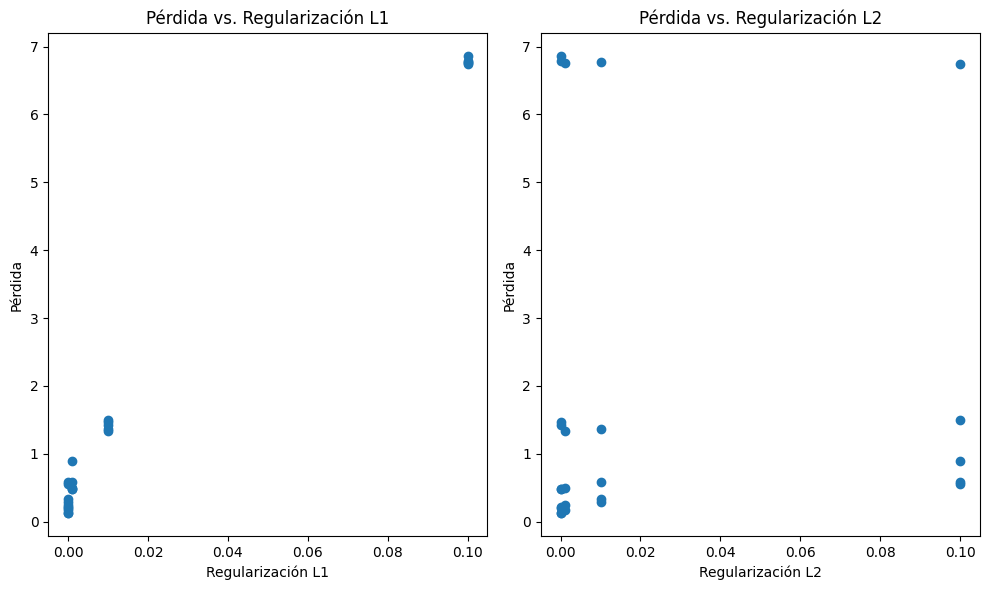

Mejor precisión: 0.9757000207901001
Mejor L1: 1e-05
Mejor L2: 0.0001


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

# Definir una función para entrenar y evaluar el modelo y almacenar resultados
def entrenar_evaluar_modelo(l1, l2):
  modelo = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
    Dropout(0.2),
    Dense(10, activation='softmax')
  ])
  modelo.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  modelo.fit(x_train, y_train, epochs=5)
  loss, acc = modelo.evaluate(x_test, y_test)

  # Almacenar resultados para visualización
  resultados = {
    'l1': l1,
    'l2': l2,
    'accuracy': acc,
    'loss': loss
  }

  return resultados  # Devolver el diccionario de resultados

# Definir rangos de búsqueda por cuadrícula
l1_cuadricula = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
l2_cuadricula = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# Realizar búsqueda por cuadrícula y almacenar resultados
todos_resultados = []  # Lista para almacenar todos los resultados
for l1 in l1_cuadricula:
  for l2 in l2_cuadricula:
    resultados = entrenar_evaluar_modelo(l1, l2)
    todos_resultados.append(resultados)

# Extraer datos de los resultados
l1_valores = [resultado['l1'] for resultado in todos_resultados]
l2_valores = [resultado['l2'] for resultado in todos_resultados]
accuracy_valores = [resultado['accuracy'] for resultado in todos_resultados]
loss_valores = [resultado['loss'] for resultado in todos_resultados]

l1_valores = np.array(l1_valores)
l2_valores = np.array(l2_valores)
accuracy_valores = np.array(accuracy_valores)
loss_valores = np.array(loss_valores)

# Visualización de datos
plt.figure(figsize=(10, 6))

# Pérdida vs. l1
plt.subplot(1, 2, 1)
plt.scatter(l1_valores, loss_valores)
plt.xlabel('Regularización L1')
plt.ylabel('Pérdida')
plt.title('Pérdida vs. Regularización L1')

# Pérdida vs. l2
plt.subplot(1, 2, 2)
plt.scatter(l2_valores, loss_valores)
plt.xlabel('Regularización L2')
plt.ylabel('Pérdida')
plt.title('Pérdida vs. Regularización L2')

plt.tight_layout()
plt.show()


# Imprimir los mejores valores de L1 y L2
mejor_precision = max(accuracy_valores)
mejor_l1, mejor_l2 = None, None
for resultado in todos_resultados:
  if resultado['accuracy'] == mejor_precision:
    mejor_l1 = resultado['l1']
    mejor_l2 = resultado['l2']

print("Mejor precisión:", mejor_precision)
print("Mejor L1:", mejor_l1)
print("Mejor L2:", mejor_l2)


Realizamos una búsqueda para otros valores

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5129 - accuracy: 0.9079
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3344 - accuracy: 0.9480
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2966 - accuracy: 0.9556
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2768 - accuracy: 0.9594
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2269 - accuracy: 0.9730
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5632 - accuracy: 0.9033
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3723 - accuracy: 0.9402
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3351 - accuracy: 0.9491
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3160 - accuracy: 0.9530
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2568 - accur

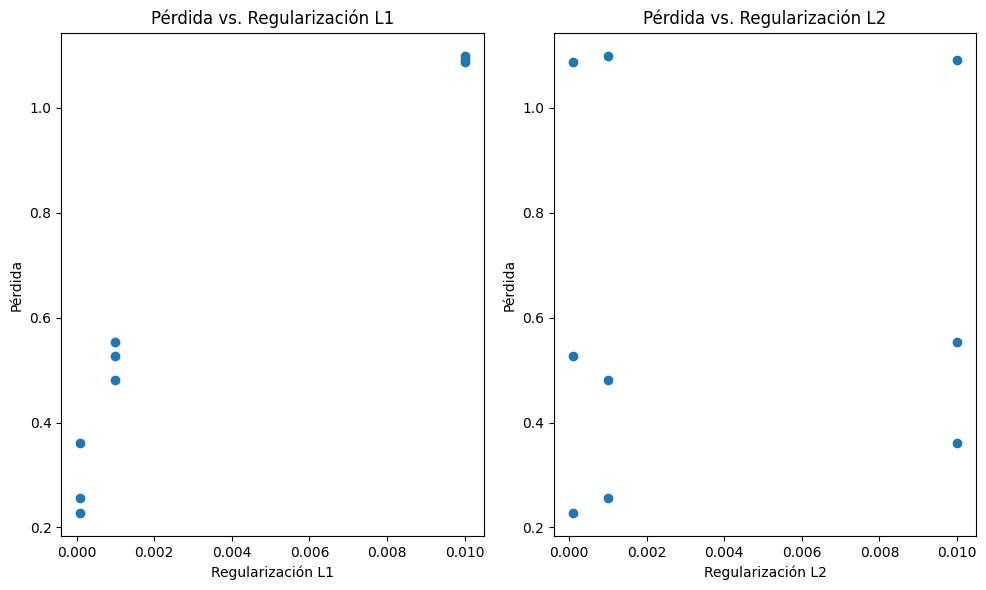

Mejor precisión: 0.9729999899864197
Mejor L1: 0.0001
Mejor L2: 0.0001


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Definir una función para entrenar y evaluar el modelo y almacenar resultados
def entrenar_evaluar_modelo(l1, l2):
  modelo = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
    Dropout(0.2),
    Dense(10, activation='softmax')
  ])
  modelo.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  modelo.fit(x_train, y_train, epochs=5)
  loss, acc = modelo.evaluate(x_test, y_test)

  # Almacenar resultados para visualización
  resultados = {
    'l1': l1,
    'l2': l2,
    'accuracy': acc,
    'loss': loss
  }

  return resultados  # Devolver el diccionario de resultados

# Definir rangos de búsqueda por cuadrícula
l1_cuadricula = [1e-4, 1e-3, 1e-2]
l2_cuadricula = [1e-4, 1e-3, 1e-2]

# Realizar búsqueda por cuadrícula y almacenar resultados
todos_resultados = []  # Lista para almacenar todos los resultados
for l1 in l1_cuadricula:
  for l2 in l2_cuadricula:
    resultados = entrenar_evaluar_modelo(l1, l2)
    todos_resultados.append(resultados)

# Extraer datos de los resultados
l1_valores = [resultado['l1'] for resultado in todos_resultados]
l2_valores = [resultado['l2'] for resultado in todos_resultados]
accuracy_valores = [resultado['accuracy'] for resultado in todos_resultados]
loss_valores = [resultado['loss'] for resultado in todos_resultados]

l1_valores = np.array(l1_valores)
l2_valores = np.array(l2_valores)
accuracy_valores = np.array(accuracy_valores)
loss_valores = np.array(loss_valores)

# Visualización de datos
plt.figure(figsize=(10, 6))

# Pérdida vs. l1
plt.subplot(1, 2, 1)
plt.scatter(l1_valores, loss_valores)
plt.xlabel('Regularización L1')
plt.ylabel('Pérdida')
plt.title('Pérdida vs. Regularización L1')

# Pérdida vs. l2
plt.subplot(1, 2, 2)
plt.scatter(l2_valores, loss_valores)
plt.xlabel('Regularización L2')
plt.ylabel('Pérdida')
plt.title('Pérdida vs. Regularización L2')

plt.tight_layout()
plt.show()


# Imprimir los mejores valores de L1 y L2
mejor_precision = max(accuracy_valores)
mejor_l1, mejor_l2 = None, None
for resultado in todos_resultados:
  if resultado['accuracy'] == mejor_precision:
    mejor_l1 = resultado['l1']
    mejor_l2 = resultado['l2']

print("Mejor precisión:", mejor_precision)
print("Mejor L1:", mejor_l1)
print("Mejor L2:", mejor_l2)

Imprimimos una tabla con los resultados obtenidos y los mejores valores de l1 y l2

In [ ]:
import tabulate

# Define los resultados
resultados_previos = {
    "Mejor precisión": 0.9755,
    "Mejor L1": 1e-05,
    "Mejor L2": 0.0001
}

resultados_nuevos = {
    "Mejor precisión": 0.9721,
    "Mejor L1": 0.0001,
    "Mejor L2": 0.0001
}

# Crea los datos de la tabla
datos_tabla = [
    ["Métrica", "Resultados anteriores", "Nuevos resultados"],
    ["Mejor precisión", resultados_previos["Mejor precisión"], resultados_nuevos["Mejor precisión"]],
    ["Mejor L1", resultados_previos["Mejor L1"], resultados_nuevos["Mejor L1"]],
    ["Mejor L2", resultados_previos["Mejor L2"], resultados_nuevos["Mejor L2"]]
]

# Imprime la tabla usando tabulate
print(tabulate.tabulate(datos_tabla, tablefmt="pipe"))

|:----------------|:----------------------|:------------------|
| Métrica         | Resultados anteriores | Nuevos resultados |
| Mejor precisión | 0.9755                | 0.9721            |
| Mejor L1        | 1e-05                 | 0.0001            |
| Mejor L2        | 0.0001                | 0.0001            |
